In [2]:
import xarray as xr
import dask
import netCDF4
from netCDF4 import MFDataset
import numpy as np
import timeit
import matplotlib.pyplot as plt

<h3>Part 0: Loading in data </h3>

In [3]:
filepath = '/home/disk/eos9/cmip6/piControl'
model_ex = '/MIROC6'
variable_ex = '/tas'
file_full = filepath+model_ex+variable_ex
print(file_full)

/home/disk/eos9/cmip6/piControl/MIROC6/tas


First, we'll load the file as a an <code>xarray Dataset</code>.  We tell it which dimension we want to concatenate along.  I chose <i>'time'</i>, but we could concatenate along longitude (<i>'lon'</i>) or latitude (<i>'lat'</i>) if we wanted. We can throw in a <code>%time</code> to see how long it takes (gives us CPU time and wall time)

In [4]:
ens_ex = 'r1i1p1f1'
fname_full = file_full+'/*{ens_ex}*.nc'.format(ens_ex=ens_ex)
print(fname_full)
%time ds_xr = xr.open_mfdataset(fname_full,concat_dim='time')
ds_xr

/home/disk/eos9/cmip6/piControl/MIROC6/tas/*r1i1p1f1*.nc


/home/disk/sipn/mcmcgraw/anaconda3/envs/xarray_examples/lib/python3.7/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/disk/sipn/mcmcgraw/anaconda3/envs/xarray_examples/lib/python3.7/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


CPU times: user 385 ms, sys: 25.4 ms, total: 410 ms
Wall time: 432 ms


/home/disk/sipn/mcmcgraw/anaconda3/envs/xarray_examples/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/disk/sipn/mcmcgraw/anaconda3/envs/xarray_examples/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alt

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 128, lon: 256, time: 9600)
Coordinates:
    height     float64 2.0
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time       (time) object 3200-01-16 12:00:00 ... 3999-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1200, 128, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1200, 256, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(1200, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  365242.0
    creation_date:          2018-11-3

First of all, loading this data set using </code>xarray</code> took about 350 ms, according to </code>%time</code>. CPU time was 362 ms; wall time was 358 ms

Now, we'll load the same dataset with </code>netCDF4</code>. We can use </code>MFDataset</code> to find all the netCDF files in our folder (similar to </code>open_mfdataset</code>). Here, if we don't specify, it'll automatically concatenate along the unlimited dimension (<i>'time'</i>, in this case; you can specify this when you're creating the file), and we'll get the same result as <code>xarray</code>.  However, if we try to concatenate along a different dimension, we get an array that doesn't include all the files for some reason.  Generally you'd probably always want to concatenate along the unlimited dimension anyway, so practically speaking this might not matter, but if you want to do something a bit more unconventional it'll likely be harder in <code>netCDF4</code>. 

In [5]:
%time ds_nc4 = MFDataset(fname_full,'r')
ds_nc4

CPU times: user 23.9 ms, sys: 3.92 ms, total: 27.8 ms
Wall time: 27.3 ms


<class 'netCDF4._netCDF4.MFDataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: standard
    branch_time_in_child: 0.0
    branch_time_in_parent: 365242.0
    creation_date: 2018-11-30T09:01:58Z
    data_specs_version: 01.00.28
    experiment: pre-industrial control
    experiment_id: piControl
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.MIROC.MIROC6.piControl.none.r1i1p1f1
    grid: native atmosphere T85 Gaussian grid
    grid_label: gn
    history: 2018-11-30T09:01:58Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: JAMSTEC (Japan Agency for Marine-Earth Science and Technology, Kanagawa 236-0001, Japan), AORI (Atmosphere and Ocean Research Institute, The University of Tokyo, Chiba 277-8564, Japan), NIES (National Institute for En

<code>netCDF4</code> is actually faster to load by about an order of magnitude.  CPU time was 57.5 ms and wall time was 58.2 ms. 

Get temperature (<i>tas</i>) data from each data set.  our <code>xarray</code> data will still be a <code>DataArray</code>, while our <code>netCDF4</code> data will be a <code>netCDF4</code> variable. we note that both of our data sets should have the same dimensions

In [6]:
%time tas_xr = ds_xr['tas']
print(tas_xr)
%time tas_nc = ds_nc4.variables['tas']
print(tas_nc)

CPU times: user 90 µs, sys: 73 µs, total: 163 µs
Wall time: 170 µs
<xarray.DataArray 'tas' (time: 9600, lat: 128, lon: 256)>
dask.array<concatenate, shape=(9600, 128, 256), dtype=float32, chunksize=(1200, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) object 3200-01-16 12:00:00 ... 3999-12-16 12:00:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  T2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 11.9 µs
<class 'netCDF4._netCDF4._Variable'>
float32 tas('time', 'lat', 'lon')
    standard_name: air_temperature
    long_name: Near-Surface Air Temperatu

<code>netCDF4</code> is also faster at reading in the <i>tas</i> variable by about an order of magnitude: ~15 us for <code>netCDF4</code> vs ~125 us for <code>xarray</code>.

<h3>Part 1: Subsetting the data </h3>
Now, we'll take a slice between 40 and 60 N.  First, we'll do it with <code>xarray</code>.  We'll see that instead of having 128 points in latitude, we're down to 14. 

Also, we can use <code>%%time</code> to see how long it takes for the entire cell to run

In [7]:
%%time
tas_xr_slice = tas_xr.sel(lat=slice(40,60))
tas_xr_slice

CPU times: user 7.6 ms, sys: 0 ns, total: 7.6 ms
Wall time: 7.37 ms


<xarray.DataArray 'tas' (time: 9600, lat: 14, lon: 256)>
dask.array<getitem, shape=(9600, 14, 256), dtype=float32, chunksize=(1200, 14, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 41.32 42.72 44.12 45.52 ... 55.33 56.73 58.13 59.53
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) object 3200-01-16 12:00:00 ... 3999-12-16 12:00:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  T2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

Okay, slicing our <code>xarray</code> takes about 7 ms.

With <code>netCDF4</code>, it's more complicated--we have to load our latitude coordinate, find the corresponding indices, and subset over those. We also have to figure out which dimension latitude is

In [8]:
%%time
lat_nc = ds_nc4.variables['lat'][:] #the [:] is necessary to get the actual values of lat
lat_min = 40
lat_max = 60
f_lat = np.where((lat_nc>lat_min) & (lat_nc<lat_max))
lat_trim = lat_nc[f_lat]

CPU times: user 1.66 ms, sys: 1.32 ms, total: 2.98 ms
Wall time: 1.82 ms


It took us 2-3 ms to identify our latitude indices

Now, figure out which dimension we are trimming.  We can either look at the metadata and hard-code it...


In [30]:
%%time
tas_nc_slice_v1 = tas_nc[:][:,f_lat,:]
tas_nc_slice_v1 = np.squeeze(tas_nc_slice_v1) #do a squeeze just to be careful
print(tas_nc_slice_v1.shape) #should be same as xarray

(9600, 14, 256)
CPU times: user 4.81 s, sys: 776 ms, total: 5.58 s
Wall time: 5.58 s


Now, we see where xarray is way faster--it took us 5.5 SECONDS to slice the <code>netCDF4</code> array, and that's with just looking at the metadata and hard-coding it.  

If we want to be more rigorous, we can more generally identify and select the correct dimension.  There are lots of ways to do this, some cumbersome and some more concise.  This was the most concise way I could think of (but honestly I'd probably think less and write something more cumbersome)

In [10]:
%%time
len_lat = len(lat_nc)
dim_size = tas_nc[:].shape
dim_sel = dim_size.index(len_lat)
if dim_sel == 0:
    tas_nc_slice_v2 = tas_nc[:][f_lat,:,:]
elif dim_sel == 1:
    tas_nc_slice_v2 = tas_nc[:][:,f_lat,:]
elif dim_sel == 2:
    tas_nc_slice_v2 = tas_nc[:][:,:,f_lat]
    
tas_nc_slice_v2 = np.squeeze(tas_nc_slice_v2)
print(tas_nc_slice_v2.shape)
#print(tas_nc_slice_v2 - tas_nc_slice_v1) #should be zeros

(9600, 14, 256)
CPU times: user 9.41 s, sys: 1.53 s, total: 10.9 s
Wall time: 10.9 s


wow, the more rigorous way where we do NOT hard-code the dimension takes almost 11 SECONDS to slice.  So while <code>netCDF4</code> actually loads the data a little bit faster, it was way faster to slice the <code>xarray</code> data (and took one line).

<h3> Part 2: Applying math operations directly to data </h3>

Now, we'll look at doing some simple math operations with our data.  We'll go back to our full datasets.  We'll start by just taking a zonal mean. With <code>xarray</code>, we can just specify that we want to take a mean over our longitude dimension...

In [11]:
%%time
tas_zm_xr = tas_xr.mean(dim='lon')
print(tas_zm_xr.shape)

(9600, 128)
CPU times: user 1.85 ms, sys: 0 ns, total: 1.85 ms
Wall time: 1.8 ms


*hits button* that was easy! We don't have to know which dimension corresponds to longitude--<code>xarray</code> takes care of it.  It's also quick--a bit less than 4 ms. We can compound operations, and take a zonal mean of <i>tas</i> from 40-60 N

In [12]:
%%time
tas_zm_xr_limited = tas_xr.sel(lat=slice(40,60)).mean(dim='lon')
print(tas_zm_xr_limited.shape)

(9600, 14)
CPU times: user 9.86 ms, sys: 0 ns, total: 9.86 ms
Wall time: 9.59 ms


So now, in one line of code and about 8 ms, we have created zonal means of surface air temperature between 40-60N at every time step. We can go one step farther, and average over a box...

In [15]:
%%time
tas_xr_box = tas_xr.sel(lat=slice(40,60)).mean(dim=['lon','lat'])
print(tas_xr_box.shape)

(9600,)
CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 10.1 ms


Again, it took us one line of code and just a few ms (10 this time).  Now, let's try to do these things with our <code>netCDF4</code> data.  While <code>xarray</code> converts in and out of <code>numpy</code> under the hood, we'll do it more explictly here, by directly applying <code>numpy</code> functions.  We can make our lives easier (and emulate our actual workflow, tbh) by looking at the metadata and hard-coding our dimension

In [27]:
%%time
print(tas_nc)
tas_zm_nc = np.nanmean(tas_nc[:],axis=2)
print(tas_zm_nc.shape)

<class 'netCDF4._netCDF4._Variable'>
float32 tas('time', 'lat', 'lon')
    standard_name: air_temperature
    long_name: Near-Surface Air Temperature
    comment: near-surface (usually, 2 meter) air temperature
    units: K
    original_name: T2
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2018-11-30T09:01:58Z altered by CMOR: Treated scalar dimension: 'height'. 2018-11-30T09:01:58Z altered by CMOR: replaced missing value flag (-999) with standard missing value (1e+20). 2018-11-30T09:01:58Z altered by CMOR: Inverted axis: lat.
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
unlimited dimensions = ('time',)
current size = (9600, 128, 256)
(9600, 128)
CPU times: user 5.6 s, sys: 920 ms, total: 6.52 s
Wall time: 6.51 s


Wow, this takes over 6 seconds when we hard-code everything.  If we have to actually figure out which dimension we are going to average along, we have to write a few more lines. 

In [28]:
%%time
lon = ds_nc4.variables['lon'][:]
len_lon = len(lon)
dim_sel_2 = dim_size.index(len_lon)
tas_zm_nc_v2 = np.nanmean(tas_nc[:],axis=dim_sel_2)
print(tas_zm_nc_v2.shape)

(9600, 128)
CPU times: user 5.55 s, sys: 948 ms, total: 6.5 s
Wall time: 6.49 s


This approach takes about the same amount of time (the actual taking the average is probably the computationally intensive part), but it takes 4 lines of code instead of 1. 

If we want to do the slice-and-mean, that'll take longer. We'll repeat the subsetting here, just so we can see how long the whole thing takes. 

In [32]:
%%time
tas_nc_slice_v1b = tas_nc[:][:,f_lat,:]
tas_nc_slice_v1b = np.squeeze(tas_nc_slice_v1b)
tas_nc_slice_zm = np.nanmean(tas_nc_slice_v1b,axis=dim_sel_2)

CPU times: user 4.87 s, sys: 776 ms, total: 5.64 s
Wall time: 5.64 s


Okay, again, the <code>netCDF4</code> plus <code>numpy</code> approach is about 3 orders of magnitude slower than the <code>xarray</code> approach, and it usually takes many more lines of code.  Finally, we can take the average over a box. Again, we'll do all of our operations in one box to try to get a better sense of how long it takes. 

In [33]:
%%time
#Figure out which dimensions correspond to lon and lat
lon = ds_nc4.variables['lon'][:]
len_lon = len(lon)
dim_sel_lon = dim_size.index(len_lon)
#lat
dim_sel_lat = dim_size.index(len_lat)
#Subset our data based on f_lat and take two averages
tas_nc_slice_v1c = tas_nc[:][:,f_lat,:]
tas_nc_slice_v1c = np.squeeze(tas_nc_slice_v1c)
tas_nc_slice_box = np.nanmean(np.nanmean(tas_nc_slice_v1c,axis=dim_sel_lon),dim_sel_lat)

CPU times: user 4.88 s, sys: 735 ms, total: 5.62 s
Wall time: 5.61 s


Again, we see it takes about 5.5 seconds, and a bunch of lines of code. 

<h3>Part 3: Quick plots to keep help you debug as you go</h3>

Finally, we'll demonstrate how xarray can help you make quick plots (like the kind you'd like to see as you debug).  We'll start by simply plotting our time series that we created by zonally averaging over the box 40-60N.  First, <code>xarray</code>.  We can do the entire thing in one line.  Just like with <code>numpy</code>, <code>xarray</code> calls the basic <code>matplotlib</code> commands under the hood. 

CPU times: user 4.52 s, sys: 152 ms, total: 4.67 s
Wall time: 4.46 s


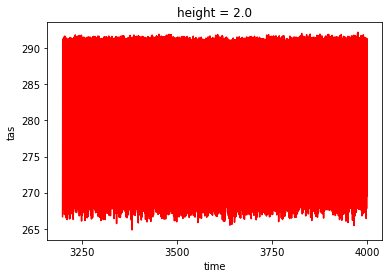

In [52]:
%%time
tas_xr_box_plot = tas_xr.sel(lat=slice(40,60)).mean(dim=['lon','lat']).plot(color='r')

If we want to zoom in on the first 100 days, we need a second line.  We'll move the <code>plot</code> command to the second line. Note that we can do some basic operations, like set line color or style, in the initial <code>plot</code> command, but if we wanted to make bigger changes, we'd have to do that separately. 

CPU times: user 582 ms, sys: 24.1 ms, total: 606 ms
Wall time: 602 ms


Text(0.5, 1.0, 'first 100 days')

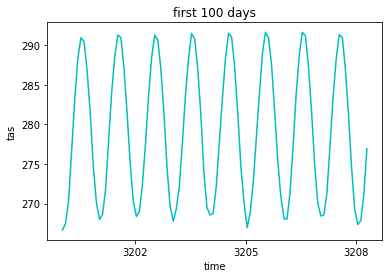

In [57]:
%%time
tas_xr_box_v2 = tas_xr.sel(lat=slice(40,60)).mean(dim=['lon','lat'])
tas_xr_zoom = tas_xr_box_v2.isel(time=slice(0,100)).plot(color='c')
plt.title('first 100 days')

Let's make the same 2 plots with our <code>netCDF4</code> + <code>numpy</code> approach, and now we're adding <code>matplotlib</code> into the mix.  Again, we'll do our averaging and plotting in the same cell so we can see how long it takes

CPU times: user 4.87 s, sys: 784 ms, total: 5.66 s
Wall time: 5.65 s


Text(0, 0.5, 'tas')

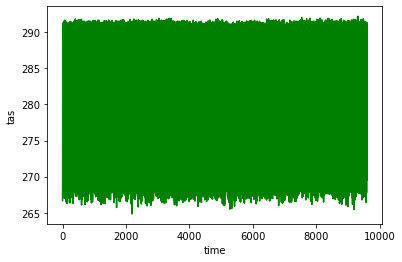

In [61]:
%%time
len_lon = len(lon)
dim_sel_lon = dim_size.index(len_lon)
#lat
dim_sel_lat = dim_size.index(len_lat)
#Subset our data based on f_lat and take two averages
tas_nc_slice_v1d = tas_nc[:][:,f_lat,:]
tas_nc_slice_v1d = np.squeeze(tas_nc_slice_v1d)
tas_nc_slice_box_to_plot = np.nanmean(np.nanmean(tas_nc_slice_v1d,axis=dim_sel_lon),dim_sel_lat)

plt.plot(tas_nc_slice_box_to_plot,color='g')
plt.xlabel('time')
plt.ylabel('tas')

Okay, in this case, the times are similar (4.5 vs 5.5 seconds), but it takes more lines to make the plot.  And while the <code>xarray</code> implementation of <code>matplotlib</code> will automatically label your axes and get values that actually correspond to your axes (since we're using a <i>piControl</i> run, our time axis in the <code>xarray</code> plots is based on the years of the <i>piControl</i> run, I think), it takes a couple of extra lines to get a basic plot. Let's make the first 100 time slices version...

CPU times: user 4.92 s, sys: 744 ms, total: 5.66 s
Wall time: 5.65 s


Text(0.5, 1.0, 'first 100 days')

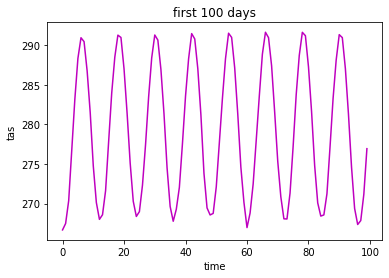

In [63]:
%%time
len_lon = len(lon)
dim_sel_lon = dim_size.index(len_lon)
#lat
dim_sel_lat = dim_size.index(len_lat)
#Subset our data based on f_lat and take two averages
tas_nc_slice_v1d = tas_nc[:][:,f_lat,:]
tas_nc_slice_v1d = np.squeeze(tas_nc_slice_v1d)
tas_nc_slice_box_to_plot = np.nanmean(np.nanmean(tas_nc_slice_v1d,axis=dim_sel_lon),dim_sel_lat)

plt.plot(tas_nc_slice_box_to_plot[0:100,],color='m')
plt.xlabel('time')
plt.ylabel('tas')
plt.title('first 100 days')

In this case, the <code>xarray</code> approach is much faster (since we're trimming the data down BEFORE we plot, in part). 

<h4>Final plotting example--a contour plot</h4>

Let's just make a quick contour plot of <i>tas</i> at time 0.  With <code>xarray</code> we can again do this pretty painlessly. 

CPU times: user 57.7 ms, sys: 3.67 ms, total: 61.3 ms
Wall time: 60 ms


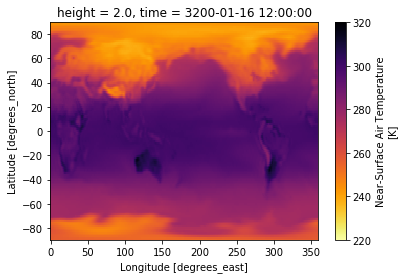

In [68]:
%%time
tas_xr.isel(time=0).plot(cmap='inferno_r',vmin=220,vmax=320)

In 60 ms, with one line of code, we can make a pretty useful and well labeled plot of <i>tas</i> in January, year 3200 of our <i>piControl</i> run.  Since <code>tas_xr.isel(time=0)</code> is 2-d data, <code>xarray.DataArray.plot()</code> automatically calls up <code>pcolormesh</code>. <br>
<br>
Note that we can also switch up our colormap and min/max values pretty easily.  We see that our axes and colorbar are automatically labeled, and our title gives us info about which time step we're looking at.  This is definitely not nice enough to actually publish, but if you want to just check and make sure you're in the right ballpark, it's pretty nice. <br>
<br>
This isn't a map (although we can kinda see the outlines of the continents because it's <i>tas</i>, but we can combine <code>xarray.DataArray.plot()</code> with <code>cartopy</code> pretty easily, by defining our plot axes with our desired map projection before we call the plot, and then assigning these axes and calling the transform (usually PlateCarree for lat-lon data) within the <code>plot</code> command.  It would look something like this:<br>
<br>
<code>ax = plt.axes(projection=ccrs.Robinson())</code> <br>
<code>tas_xr.isel(time=0).plot(ax=ax,transform=ccrs.PlateCarree())</code>
<br>
<br>
Way less fiddly than our approach with the <code>netCDF4</code>-<code>numpy</code>-<code>matplotlib</code> combo.  

CPU times: user 92.1 ms, sys: 8.55 ms, total: 101 ms
Wall time: 99.2 ms


Text(0.5, 1.0, 'time = 15.5')

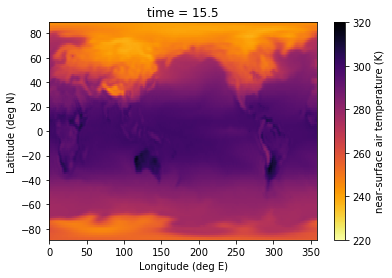

In [85]:
%%time
lon_g,lat_g = np.meshgrid(lon,lat_nc)
cp1 = plt.pcolormesh(lon_g,lat_g,tas_nc[0,:,:],cmap='inferno_r',vmin=220,vmax=320)
cbar1 = plt.colorbar(cp1,pad=0.05)
cbar1.set_label('near-surface air temperature (K)')
plt.xlabel('Longitude (deg E)')
plt.ylabel('Latitude (deg N)')
plt.title('time = {time}'.format(time=ds_nc4.variables['time'][:][0]))

So, a few differences here.  While just the basic plot command is faster than the <code>xarray</code> version, it takes about 50 percent longer to create a plot directly using the <code>matplotlib</code> commands as compared to the <code>xarray</code>-wrapped commands (60 ms for <code>xarray</code> vs 100 ms for <code>matplotlib</code> directly). <br>
<br>
<code>xarray</code> also helps with the annoying time stuff by giving you the exact date in the plot title. I'm not sure if this is <code>xarray</code>'s interpretation being smarter, or leaving things in <code>datetime</code> format longer when you keep all of your data in <code>DataArray / xarray</code> format.  For the <code>netCDF4</code>/<code>matplotlib</code> approach, it's fairly easy to plot the time step in units of <i>days since 01-01-3200</i>, but actually getting the right date would be rather involved.

<h3>Conclusions</h3>
<ol>
    <li> <code>netCDF4</code> and <code>xarray</code> both load the data pretty quickly (at least for this dataset). <code>netCDF4</code> is actually a bit faster.</li>
    <li> Loading in multiple files at once is pretty easy with both packages, although it's (probably) slightly harder to do something unconventional with <code>netCDF4</code>. </li>
    <li> With <code>xarray</code>, you can subset your data in one line, and you don't have to know anything other than the names of your dimensions.  With <code>netCDF4</code>, you can subset your data pretty quickly in about 2 lines if you look at the metadata and hard-code the appropriate dimension. If you do this, and you load in a different data set where the dimensions are in a different order, you'll have to change the code.  You can also write a more versatile piece of code to guard against rewrites, but it will take longer to run. </li>
    <li> <code>xarray</code> is MUCH faster at slicing and subsetting than <code>netCDF4</code> plus <code>numpy</code>--milliseconds for <code>xarray</code> vs seconds for <code>netCDF4</code> and <code>numpy</code>.</li>
    <li> <code>xarray</code> can apply <code>numpy</code> and <code>sciPy</code> operations under the hood--you don't have to convert to/from <code>numpy</code> arrays, for example. <code>xarray</code> also has this feature with <code>matplotlib</code>. </li>
    <li>In <code>xarray</code>, we can do multiple subsetting and/or <code>numpy</code> operations in one line, and the whole thing takes 1-10 milliseconds.  When we directly use <code>numpy</code>, like we'd have to do with the <code>netCDF4</code> package, it takes more lines of code, and about 3 orders of magnitude longer (seconds vs milliseconds). </li>
    <li> We can create a basic plot with labeled axes and a title in one line with <code>xarray</code>. When we're making a time series, same plot directly using <code>matplotlib</code> is about as fast as the <code>xarray</code> version, but it takes a few more lines to make a plot with the same information.</li>
    <li> We can also create a basic but information-dense 2-D plot using the <code>xarray</code> version of <code>matplotlib</code>.  In 60 ms, with one line of code, without specifying axes or making grids, we can make a correctly-oriented <code>pcolormesh</code> plot with labeled x- and y-axes, a labeled colorbar, and a title that tells us what date we are plotting.  Producing a plot with the same amount of information using just <code>matplotlib</code> takes over 50% longer. </li>
    <li> Finally, <code>xarray</code> is better at dealing with datetime stuff</li>
    </ol>